<a href="https://colab.research.google.com/github/andreamat/Cursos_Data_Science/blob/master/PROJETO_2_%7C_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DSNP - DATA SCIENCE NA PRÁTICA com Carlos Melo**

*by [Andréa Rocha](http://lattes.cnpq.br/8217984846199750
)*

---


  

# *Projeto 2 | Analisando a Violência no Rio de Janeiro*

$\hspace{0.80cm}$

<center><img alt="Rio de Janeiro" width="80%" src="https://image.freepik.com/free-vector/brazilian-pattern-colorful-style_1015-216.jpg"></center>


$\hspace{0.80cm}$

Em 1996, a Assembléia Mundial da Saúde declarou a violência como um importante problema de saúde pública. Neste mesmo ano, Organização Mundial da Saúde (OMS) divulgou o primeiro Relatório Mundial sobre Violência e Saúde. O relatório usa a seguinte definição de violência: *“O uso intencional de força ou poder físico, ameaçado ou real, contra alguém, outra pessoa ou contra um grupo ou comunidade, que resulte ou tenha um alta probabilidade de resultar em ferimentos, morte, dano psicológico, mau desenvolvimento ou privação.”* Um resumo sobre alguns dos principais pontos do relatório mundial pode ser encontrado [neste link](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(02)11133-0/fulltext).

De acordo com [World Health Statistics 2020](https://apps.who.int/iris/bitstream/handle/10665/332070/9789240005105-eng.pdf) da OMS, as mortes no Brasil decorrentes de homicídio atingiram 33,3 pessoas a cada 100 mil habitantes. A taxa coloca o país como um dos mais violentos do mundo. O Rio de Janeiro é um dos estados mais violentos do Brasil e vastas áreas estão sob o controle de criminosos, muitos deles ligados a poderosas quadrilhas de narcotráfico. 

O objetivo deste projeto, é realizar uma análise exploratória sobre a violência no Rio de Janeiro, através das informações disponibilizadas no portal do Instituto de Segurança Pública (ISP) do governo do Rio de Janeiro.

## 1. Obtenção dos Dados##

Neste projeto, analisamos a violência no Rio de Janeiro usando as informações disponíveis em [portal ISPDados](http://www.ispdados.rj.gov.br/), página de Dados Abertos do Instituto de Segurança Pública.

As informações estatísticas publicadas no portal baseiam-se nas datas em que foram confeccionados os Registros de Ocorrências (ROs). Essas informações são construídas a partir dos ROs lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Para garantir um controle de qualidade, os ROs são submetidos à Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil.

O arquivo `csv` utilizado pode ser obtido diretamente [neste link](https://raw.githubusercontent.com/andreamat/Cursos_Data_Science/master/data/violencia_rio.csv).

###1.1. Importação dos pacotes necessários###

Para realizar as análises usamos as seguintes blibiotecas Python:
* **Pandas** - fornece estruturas e ferramentas para manipulação e análise de dados. \\
* **NumPy** -  permite realizar cálculos em Arrays Multidimensionais e executar facilmente cálculos numéricos.

Importando os pacotes utilizados:

In [1]:
import pandas as pd
import numpy as np

###1.2. Importação dos dados e criação um DataFrame *df_RJ* ###



O dataset utilizado está no meu diretório no [GitHub](https://github.com/andreamat/Cursos_Data_Science), dessa forma evitamos que em outra ocasião o portal ISP Dados Abertos esteja indisponível ou que o arquivo seja alterado. 

Criando o dataframe `df_RJ` no pandas a partir do arquivo violencia_rio.csv:

In [2]:
df_RJ = pd.read_csv('https://raw.githubusercontent.com/andreamat/Cursos_Data_Science/master/data/violencia_rio.csv')

## 2. Análise Inicial dos Dados##

Para uma melhor compreensão sobre como os dados estão estruturados no nosso dataframe, iniciamos com a visualização das suas dimensões (tamanho do dataframe). Em seguida, verificamos os nomes, a descrição e os tipos das variáveis encontrados no dataframe. Também visualizamos, nessa etapa: as primeiras linhas, as últimas linhas e a porcentagem dos valores ausentes encontrados nas variáveis (colunas).  

Essas primeiras informações são importantes para direcionar o nosso trabalho na fase de limpeza de dados, ter uma maior clareza com que tipos de dados estamos lidando e na obtenção de novos *insights* que podem contribuir para as nossas análises. 











###2.1. Tamanho do DataFrame###

Para verificar o tamanho do nosso dataframe usamos o comando `DataFrame.shape` que retorna uma tupla representando a dimensionalidade do DataFrame. 

Verificando o tamanho de `df_RJ`:

In [3]:
print('quantidade de linhas (entradas) =', df_RJ.shape[0])
print('quantidade de colunas (variáveis) =', df_RJ.shape[1])

quantidade de linhas (entradas) = 344
quantidade de colunas (variáveis) = 56


###2.2. Dicionário das variáveis###

Com o comando `DataFrame.columns` conseguimos descobrir os nomes das variáveis (colunas) do dataframe. 

Imprimindo os nomes das variáveis:

In [4]:
df_RJ.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Como podemos observar acima, algumas variáveis como 'apf', 'aaapai', 'cmp' e 'cmba' possuem siglas que não deixam claro o tipo de informação que contêm. Na página [Notas Metodológicas e Dicionários](http://www.ispdados.rj.gov.br/Notas.html) podemos encontrar dicionários com os significados dessas siglas. 

O arquivo `dicionario_crime_rio.xlsx` baixado no meu GitHub foi usado para criar um dicionário das variáveis e verificar o significado de cada variável.

Verificando a descrição das variáveis do dataframe:

In [5]:
df_dic = pd.read_excel("https://github.com/andreamat/Cursos_Data_Science/blob/master/data/dicionario_crime_rio.xlsx?raw=true", skiprows = 3, index_col = 0, usecols = [0, 1, 5])

# preencher valores ausentes na coluna Grupo
df_dic["Grupo"].fillna(method = "ffill", inplace=True)
df_dic

,Descrição da variável,Grupo
Variável,,
mes,Mês da comunicação da ocorrência,NaN
vano,Ano da comunicação da ocorrência,NaN
fase,2 - Consolidado sem errata 3 - Consolidado ...,NaN
hom_doloso,Homicídio doloso,VÍTIMAS DE CRIMES VIOLENTOS
lesao_corp_morte,Lesão corporal seguida de morte,VÍTIMAS DE CRIMES VIOLENTOS
latrocinio,Latrocínio (roubo seguido de morte),VÍTIMAS DE CRIMES VIOLENTOS
hom_por_interv_policial,Morte por intervenção de agente do Estado,VÍTIMAS DE CRIMES VIOLENTOS
letalidade_violenta,Letalidade violenta,VÍTIMAS DE CRIMES VIOLENTOS
tentat_hom,Tentativa de homicídio,VÍTIMAS DE CRIMES VIOLENTOS


###2.3. Tipos de variáveis###

Para verificar se as nossas variáveis são numéricas ou strings usamos o comando `DataFrame.dtypes` que retorna uma série com o tipo de dados de cada coluna.  

Mostrando os tipos das variáveis:

In [6]:
df_RJ.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Todas as variáveis desse dataframe são numéricas, do tipo números inteiros (`int`) ou números de pontos flutuantes ou reais (`float`).

###2.4. Primeiras e últimas entradas do DataFrame ###

Agora, vamos ver como os dados estão organizados nesse dataframe. Essa visualização permite termos uma ideia geral das informações que podem ser obtidas através desse conjuntos de dados.

Visualizando as 5 primeiras entradas:

In [7]:
df_RJ.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Visualizando as 5 últimas entradas:

In [8]:
df_RJ.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Um dos problemas mais comuns que podemos enfrentar na limpeza e exploração de dados é lidar com os valores ausentes. E, nesse caso não foi diferente!

Antes de tomarmos qualquer decisão em relação aos dados ausentes, vamos verificar a porcentagem deles em relação à totalidade do dataset. 

###2.5. Porcentagem de valores ausentes das colunas###

Usamos `DataFrame.isnull` para detectarmos os valores ausentes. Além disso, queremos saber quais variáveis possuem a maior quantidade de valores ausentes.

Verificando a porcentagem de valores ausentes nas variáveis:


In [9]:
(df_RJ.isnull().sum() / df_RJ.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Observamos que existem muitas variáveis que possuem uma quantidade expressiva de valores ausentes. Nesse momento, esses valores ausentes não são objeto da nossa análise e, por esse motivo, vamos usar as variáveis que não possuem valores ausentes.

## 3. Informações Estatísticas da Violência no Rio de Janeiro##

Como estamos lidando com uma grande quantidade de informações, se faz necessário torná-las mais condensadas para facilitar o nosso trabalho com o cojunto de dados. Nesse sentido, a estatística nos auxilia no processo de descrever e resumir esses dados. E isso é feito através da média, mediana, moda, desvio padrão, máximo e mínimo dos valores de uma determinada variável.






###3.1. Resumo estatístico do Dataframe ###

O método `DataFrame.describe` gera informações estatísticas descritivas que incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados.

Mostrando um resumo estatístico do Dataframe:


In [10]:
df_RJ.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

###3.2. Crimes contra o patrimômio###

Os crimes contra o patrimônio - tais como roubo, furto e estelionato - são aqueles que atentam diretamente contra o patrimônio de uma pessoa ou organização. Eles constituem a maioria dos crimes cometidos no Brasil. 

Os dados sobre roubo, furto e recuperação de veículos permitem uma análise com o objetivo de obter informações que ajudem no combate desse tipo de crime.

Visualizando a média de roubos, furtos e recuperação de veículos no Rio de Janeiro:

In [11]:
print('mean_roubo_veiculo =', df_RJ.roubo_veiculo.mean())
print('mean_furto_veiculos =', df_RJ.furto_veiculos.mean())
print('mean_recuperacao_veiculos =', df_RJ.recuperacao_veiculos.mean())

mean_roubo_veiculo = 2448.6976744186045
mean_furto_veiculos = 1674.671511627907
mean_recuperacao_veiculos = 1772.2383720930231


Acima, podemos visualizar que a média de roubo de veículos é a maior, seguida de furto e recuperação de veículos.

Calculando a porcentagem da média de roubo em relação a média de furto:

In [12]:
pct_1 = df_RJ.roubo_veiculo.mean() / df_RJ.furto_veiculos.mean()
percentage_roubo_vs_furto = round(pct_1*100-100,2)
print('A média de carros roubados é {}% maior que a média de carros furtados.'.format(percentage_roubo_vs_furto))

A média de carros roubados é 46.22% maior que a média de carros furtados.


Através desse cálculo, constatamos que a média de roubos é 46% maior que a média de furtos. Uma vez que roubo configura num crime mais grave que furto por envolver ameaça ou violência, verificamos que o uso da violência é muito frequente nesses tipos de crimes.  

Calculando a porcentagem de carros recuperados:

In [13]:
pct_2 = df_RJ.recuperacao_veiculos.mean() / (df_RJ.furto_veiculos.mean() + df_RJ.roubo_veiculo.mean())
percentage_carros_recuperados = round(pct_2*100,2)
print('A porcentagem de carros recuperados é igual a {}%'.format(percentage_carros_recuperados))

A porcentagem de carros recuperados é igual a 42.98%


Acima, verificamos que cerca de 43% dos carros que são furtados ou roubados são recuperados por mês.

###3.3. Crimes contra a vida###

Os crimes contra a vida podem ser classificados em: homicídio; infanticídio; aborto; e indução, ajuda ou instigação ao suicídio. Esses crimes estão entre os que possuem as penas mais altas.

A taxa de homicídios do Rio de Janeiro é outro indicador importante da violência no estado. Nesta etapa, vamos analisar o crime de homicídio doloso. Iniciamos as análises, com a visualização dos valores máximos e mínimos. Em seguida, verificamos cada uma das entradas relacionadas aos valores. E, finalizamos com a visualização dos gráficos desse crime. 

As funções `DataFrame.columns.max()` e `DataFrame.columns.min()` retornam, respectivamente, o valor máximo e mínimo das  colunas solicitadas.


Verificando o valor máximo e o valor mínimo da variável `hom_doloso`:

In [14]:
print('Valor máximo =', df_RJ.hom_doloso.max())
print('Valor mínimo =', df_RJ.hom_doloso.min())

Valor máximo = 831
Valor mínimo = 272


Visualizando as entradas de valor máximo e de valor mínimo, respectivamente:

In [15]:
df_RJ[df_RJ.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [16]:
df_RJ[df_RJ.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


O resultado acima, sugere que entre os anos de 1995 a 2015 ocorreu uma queda nos homicídios dolosos. Porém, somente com uma análise mais aprofundada podemos fazer certas afirmações.

Agora, vamos verificar como essa variável `hom_doloso` vem se comportando ao longo do tempo.

Plotando o gráfico de linhas:

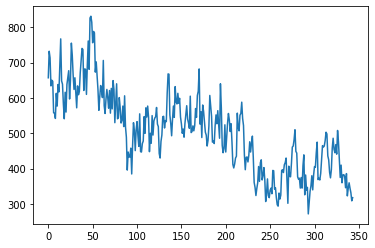

In [17]:
df_RJ.hom_doloso.plot();

Plotando um histograma:


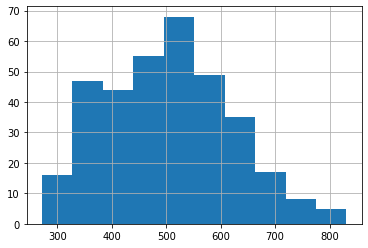

In [18]:
df_RJ.hom_doloso.hist();

Os gráficos nos mostram que apesar de ocorrerem oscilações entre o período de 1995 a 2015, houve uma queda considerável nos crimes de homicídios dolosos.



## 4. Visualização de Dados##

A representação gráfica expressa visualmente dados ou valores numéricos. Essa forma de visualização permite uma melhor interpretação e compreensão dos dados. Existem vários tipos de gráficos que podem ser usados para visualizar os dados. Nesta etapa, usamos os gráficos de linha e histograma para explorar algumas variáveis e extrair informações.

###4.1. Gráficos para apreensão de drogas###

Plotando um histograma:

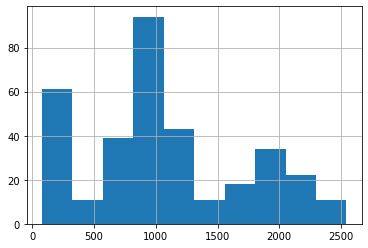

In [20]:
df_RJ.apreensao_drogas.hist();

Plotando um gráfico de linhas:

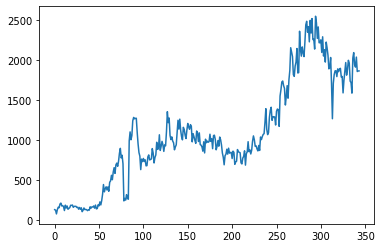

In [21]:
df_RJ.apreensao_drogas.plot();

###4.2. Gráfico de roubo em coletivo###

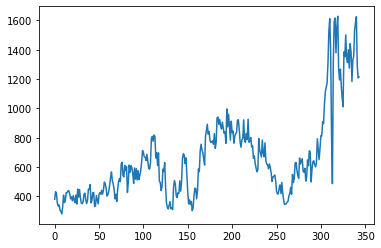

In [22]:
df_RJ.roubo_em_coletivo.plot();

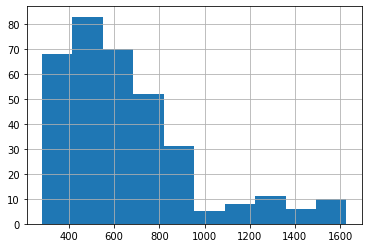

In [23]:
df_RJ.roubo_em_coletivo.hist();

## 5. Conclusões##

Neste projeto, exploramos os dados abertos relacionados à violência do Rio de Janeiro e realizamos uma análise exploratória de algumas variáveis. 

Os homicídios dolosos tiveram uma queda considerável entre os anos de 1995 a 2015. Os roubos em coletivo e a apreensão de drogas tiveram um aumento.  

